# Analyse du jeu de données `lieux-2021.csv`

Ce notebook examine le jeu de données `lieux-2021.csv`. Nous allons explorer la structure des données, identifier les problèmes tels que les valeurs manquantes et les valeurs aberrantes, et générer des statistiques descriptives et des visualisations pour mieux comprendre le jeu de données.

## Table des matières
1. [Importation des bibliothèques](#importation-des-bibliothèques)
2. [Chargement des données](#chargement-des-données)
3. [Examen des données](#examen-des-données)
4. [Identification des valeurs manquantes](#identification-des-valeurs-manquantes)
5. [Statis descriptives](#Statis-descriptives)
6. [Identification des valeurs aberrantes](#identification-des-valeurs-aberrantes)
7. [Visualisation des données](#visualisation-des-données)
8. [Conclusion](#conclusion)

## 1. Importation des bibliothèques

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

# Options de visualisation
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


In [2]:
directory_path = os.path.dirname(os.path.abspath('')) 

file_path = os.path.join(directory_path, 'data', 'lieux-2021.csv')
lieux_df = pd.read_csv(file_path)

lieux_df.head()

,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202100000001,3,981,-1,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,80
1,202100000002,3,20,0,E,2,2,0,1,0,10,1,NaN,-1,1,0,1,80
2,202100000003,4,GENERAL GALLIENI (BOULEVARD DU),0,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50
3,202100000004,3,GENERAL GALLIENI (BOULEVARD DU),0,NaN,2,4,0,1,0,1,1,NaN,-1,1,0,1,50
4,202100000005,7,PARIS. ROUTE DE,-1,NaN,2,2,-1,1,11,150,1,NaN,-1,1,0,1,50


## 3. Examen des données

In [3]:
lieux_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56518 entries, 0 to 56517
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Num_Acc  56518 non-null  int64 
 1   catr     56518 non-null  int64 
 2   voie     52111 non-null  object
 3   v1       56518 non-null  int64 
 4   v2       4990 non-null   object
 5   circ     56518 non-null  int64 
 6   nbv      56518 non-null  int64 
 7   vosp     56518 non-null  int64 
 8   prof     56518 non-null  int64 
 9   pr       56518 non-null  object
 10  pr1      56518 non-null  object
 11  plan     56518 non-null  int64 
 12  lartpc   108 non-null    object
 13  larrout  56518 non-null  object
 14  surf     56518 non-null  int64 
 15  infra    56518 non-null  int64 
 16  situ     56518 non-null  int64 
 17  vma      56518 non-null  int64 
dtypes: int64(12), object(6)
memory usage: 7.8+ MB


## 4. Identification des valeurs manquantes

In [4]:
# Identifier les valeurs manquantes
missing_values = lieux_df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values


voie       4407
v2        51528
lartpc    56410
dtype: int64

In [5]:
# Calculer le pourcentage de valeurs manquantes
missing_percentage = (missing_values / len(lieux_df)) * 100
missing_data = pd.DataFrame({'Valeurs manquantes': missing_values, 'Pourcentage': missing_percentage})
missing_data


,Valeurs manquantes,Pourcentage
voie,4407,7.797516
v2,51528,91.170954
lartpc,56410,99.808910


v2 (Indice alphanumérique de la route)  : La majorité des routes ne possèdent pas d'indice alphanumérique
lartpc (Largeur du terre-plein central) :  Le terre-plein central n'est présent que sur certaines catégories de routes

## 5. Statistiques descriptives

In [6]:
# Statistiques descriptives pour les colonnes numériques
descriptive_stats = lieux_df.describe().transpose()
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
Num_Acc,56518.0,2.021000e+11,16315.485594,2.021000e+11,2.021000e+11,2.021000e+11,2.021000e+11,2.021001e+11
catr,56518.0,3.422219e+00,1.329698,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,9.000000e+00
v1,56518.0,-1.699459e-01,0.392046,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
circ,56518.0,1.801497e+00,0.905715,-1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00
nbv,56518.0,2.381949e+00,1.378107,-1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.200000e+01
vosp,56518.0,2.115432e-01,0.669846,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
prof,56518.0,1.236208e+00,0.545806,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
plan,56518.0,1.309388e+00,0.684365,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
surf,56518.0,1.278761e+00,0.873728,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00
infra,56518.0,7.794685e-01,2.148499,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00


In [7]:
# Statistiques pour les colonnes catégorielles
categorical_columns = lieux_df.select_dtypes(include=['object']).columns
categorical_stats = lieux_df[categorical_columns].describe().transpose()
categorical_stats

,count,unique,top,freq
voie,52111,17263,1,427
v2,4990,26,D,3164
pr,56518,457,(1),19521
pr1,56518,1133,(1),19687
lartpc,108,19,0,80
larrout,56518,87,-1,53810


## 6. Identification des valeurs aberrantes

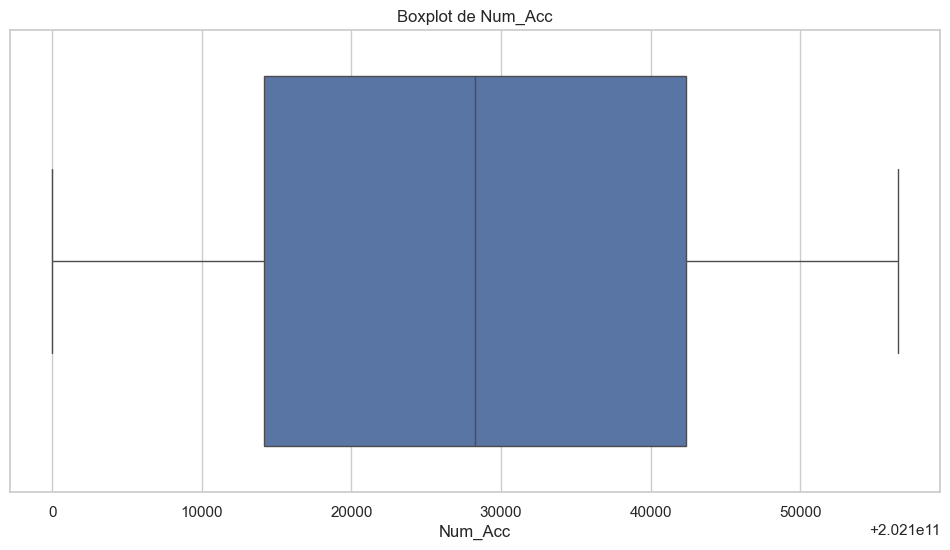

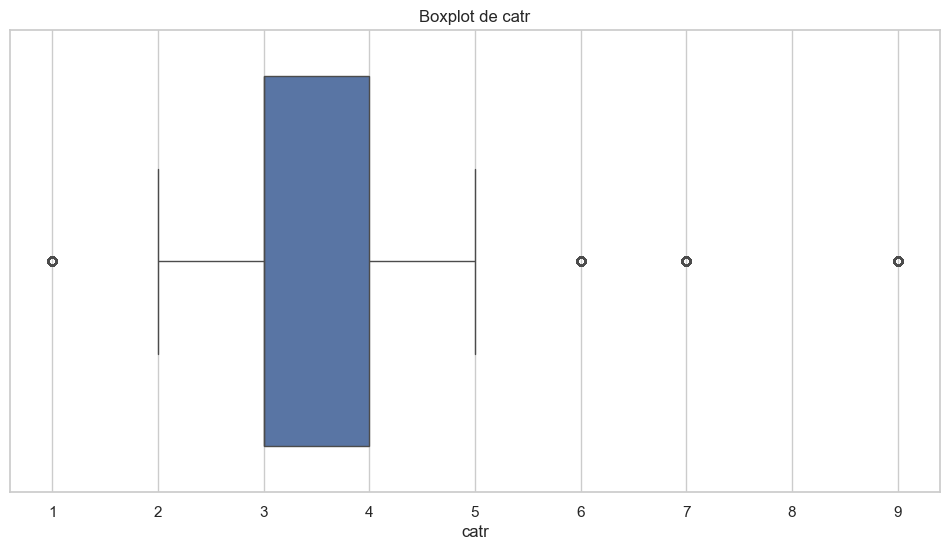

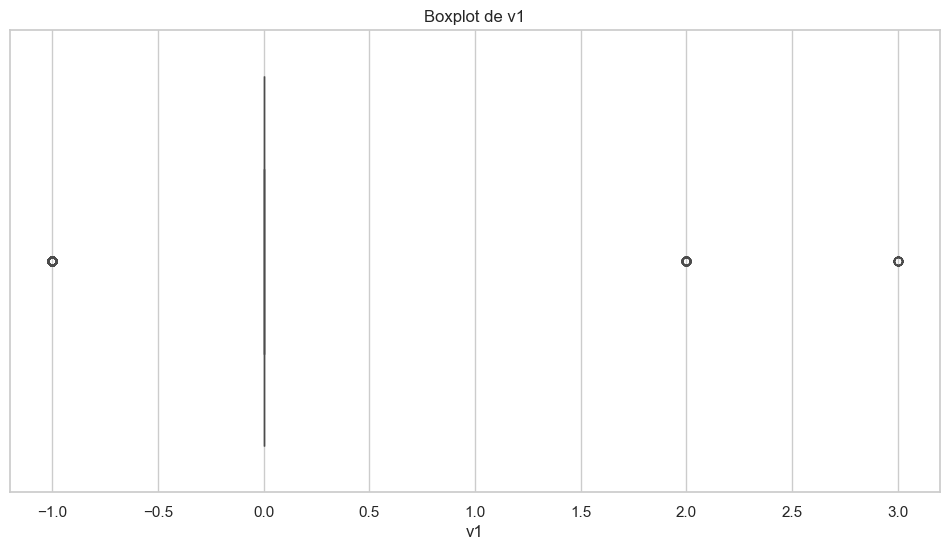

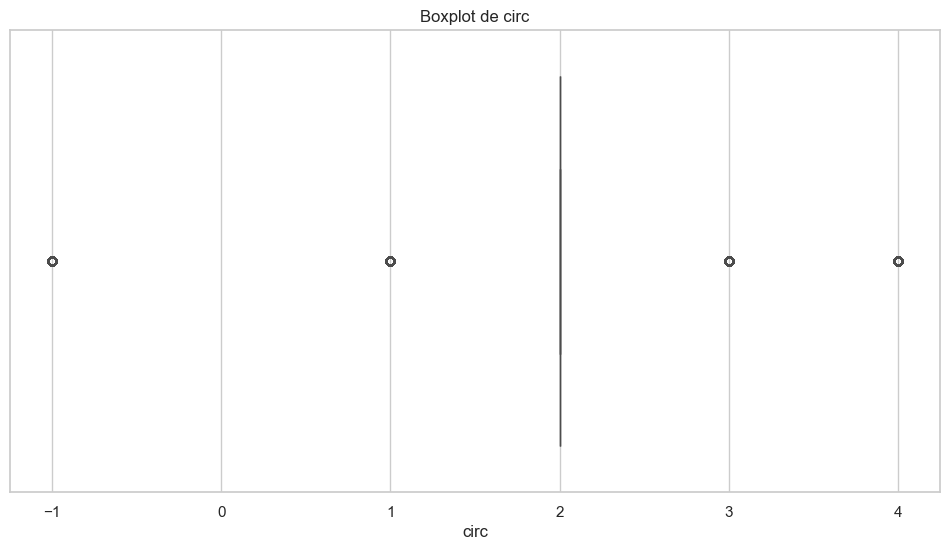

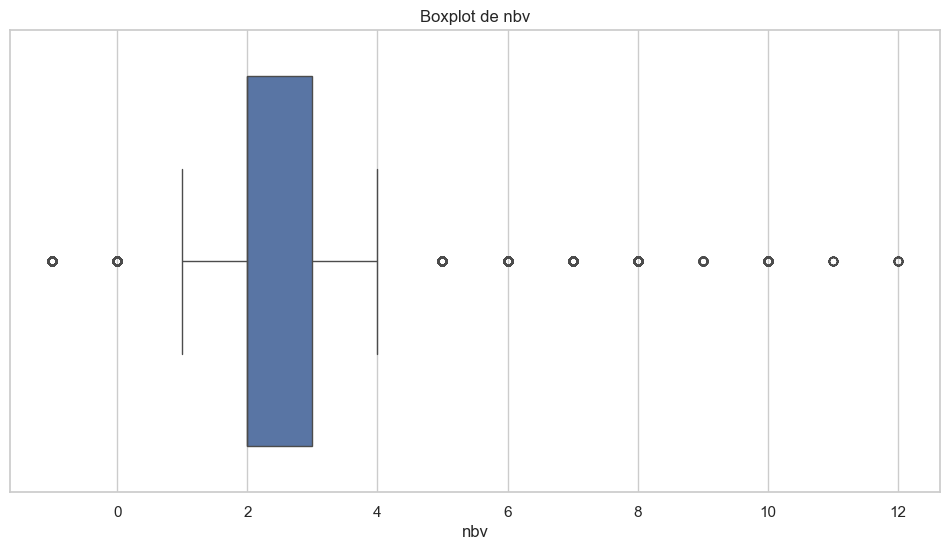

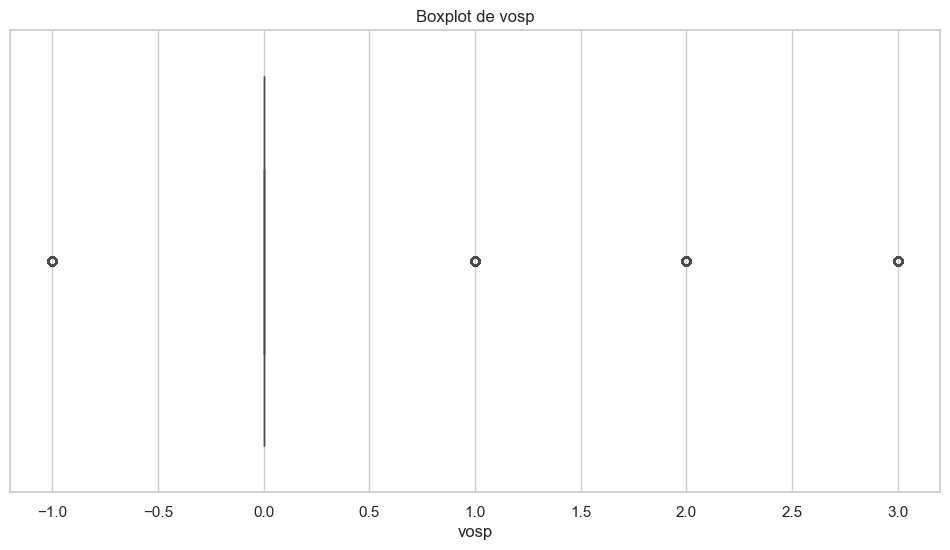

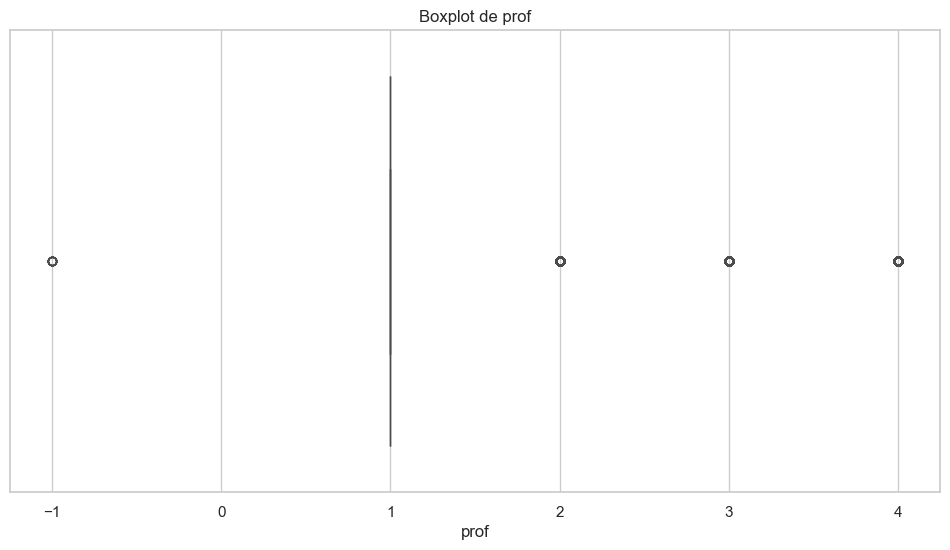

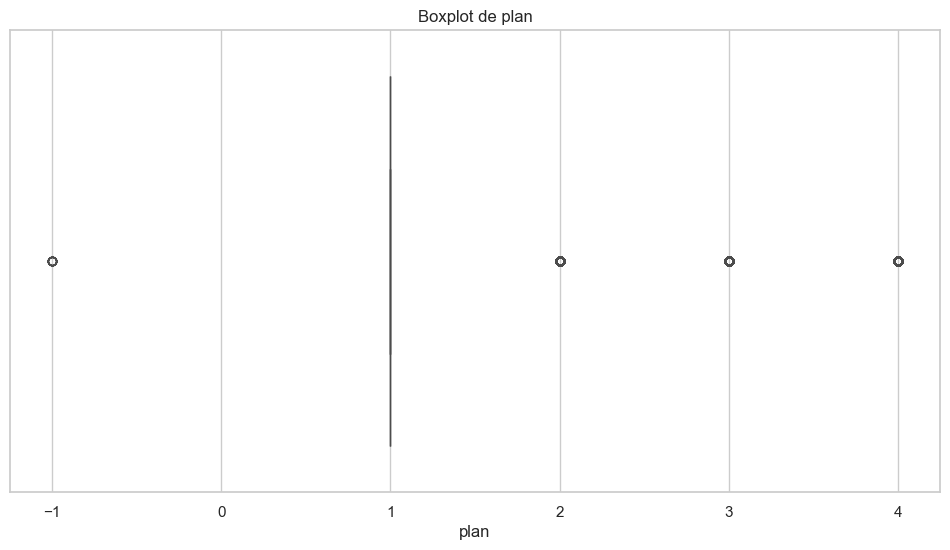

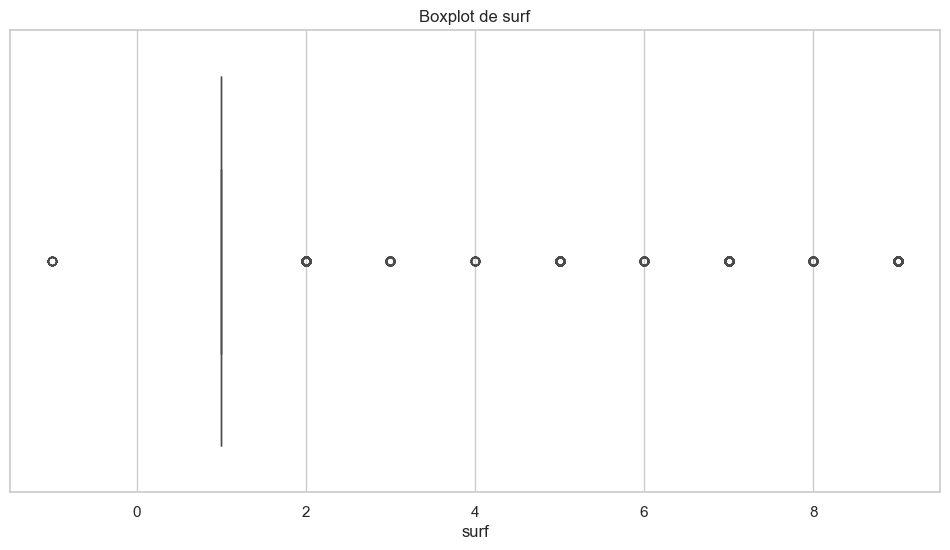

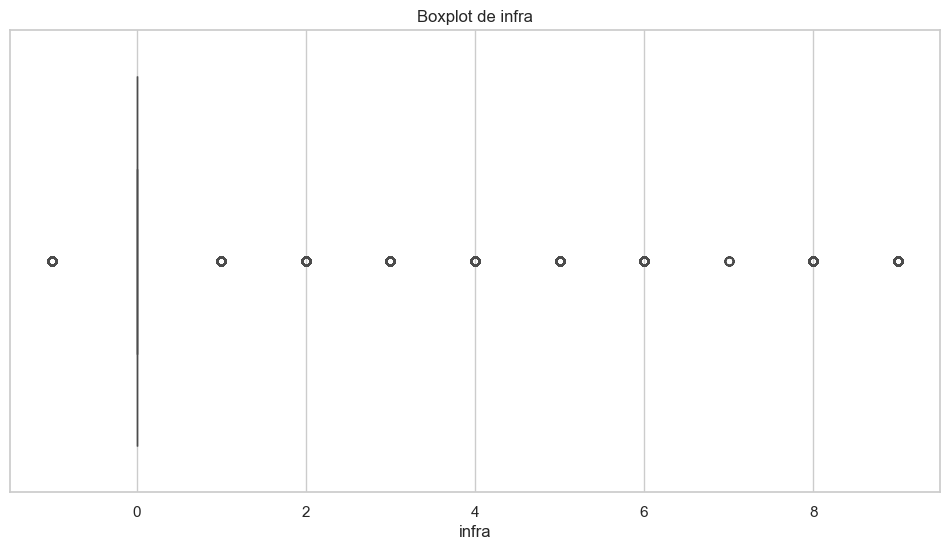

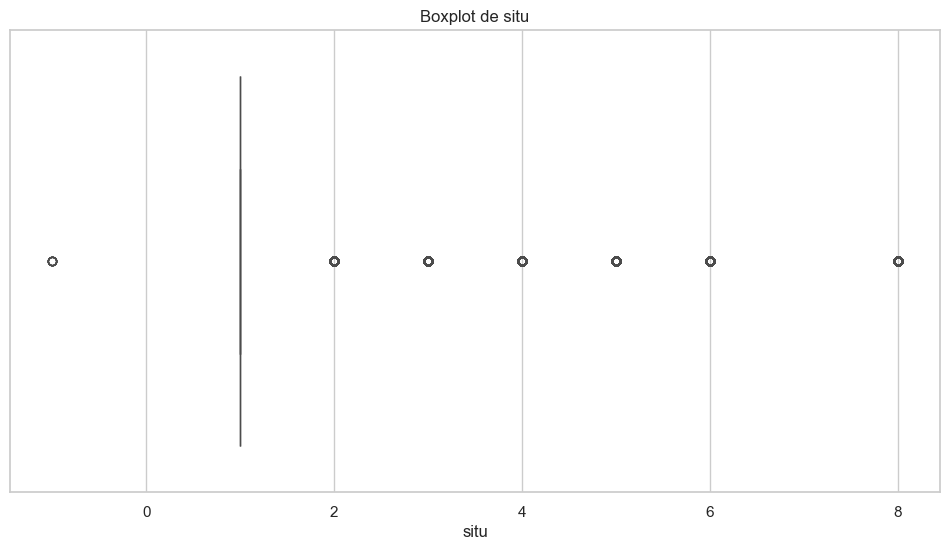

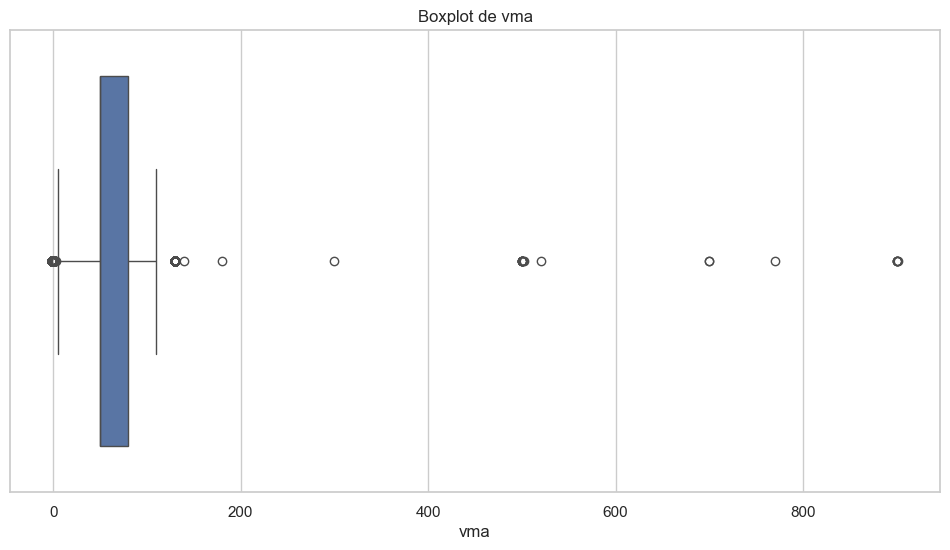

In [8]:
# Plot des boxplots pour identifier les valeurs aberrantes dans les colonnes numériques
numeric_columns = lieux_df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    plt.figure()
    sns.boxplot(x=lieux_df[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

In [9]:
# Calculer les scores Z pour les colonnes numériques pour identifier les valeurs aberrantes
z_scores = np.abs((lieux_df[numeric_columns] - lieux_df[numeric_columns].mean()) / lieux_df[numeric_columns].std())
outliers = (z_scores > 3).sum()
outliers


Num_Acc       0
catr        356
v1           99
circ       3238
nbv         907
vosp       2109
prof       1728
plan        746
surf        885
infra      2380
situ       1863
vma          21
dtype: int64

## 7. Visualisation des données

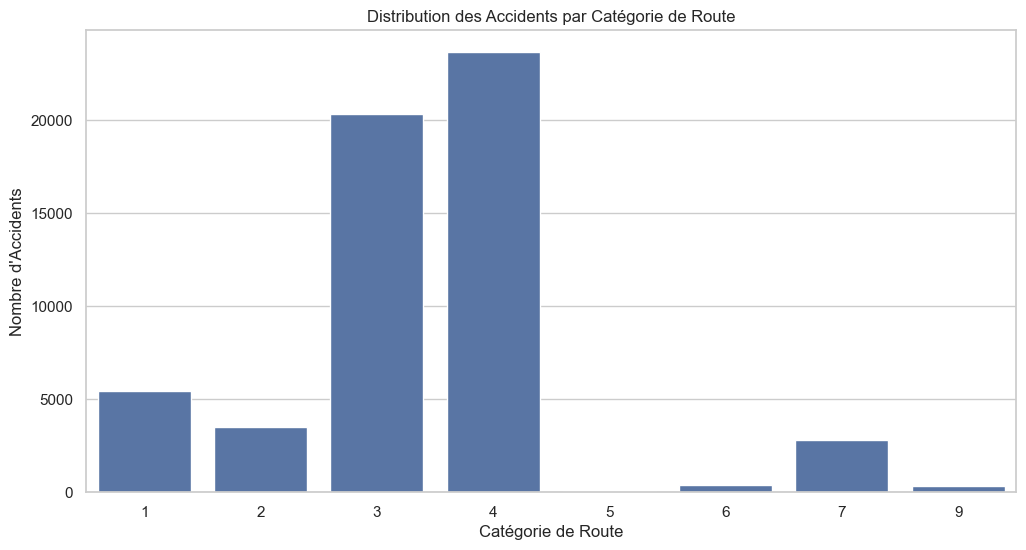

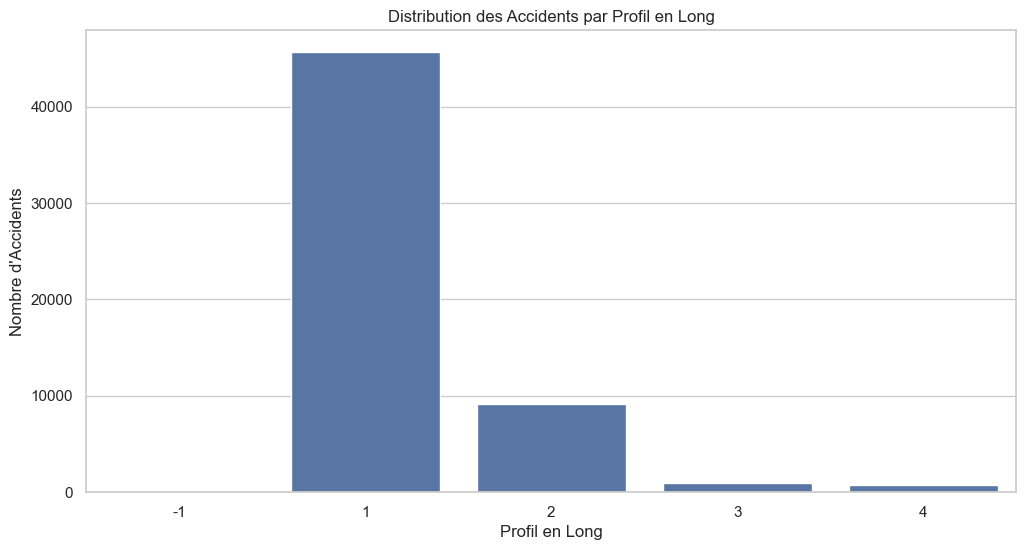

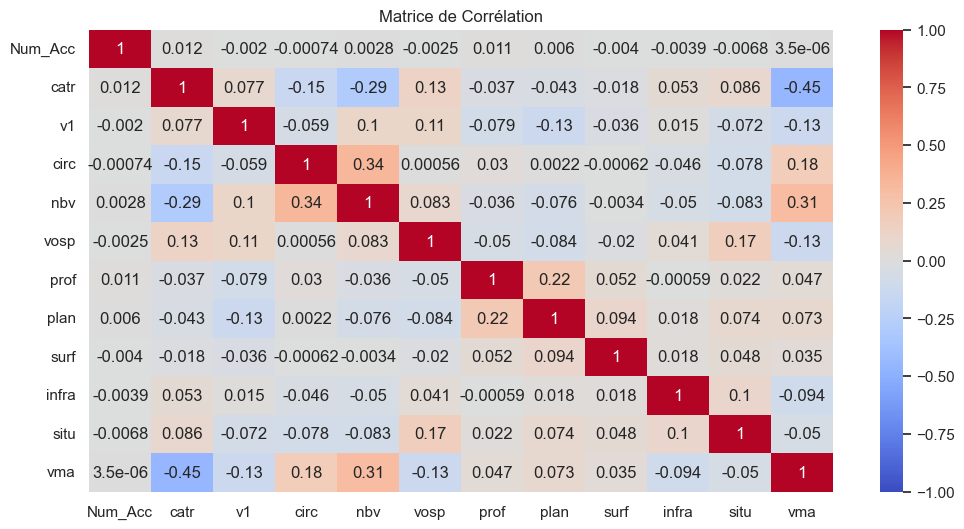

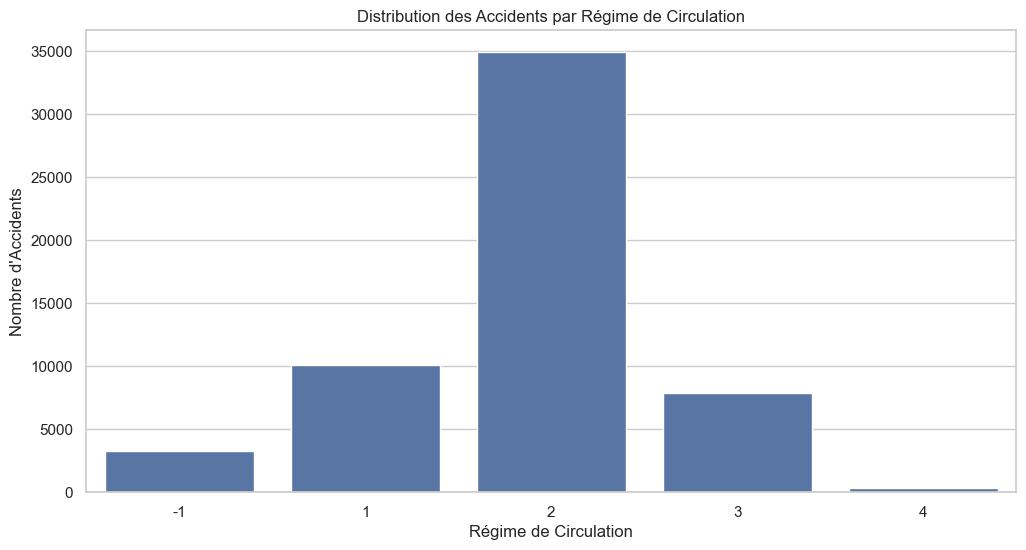

In [10]:
# Distribution des accidents par catégorie de route
plt.figure()
sns.countplot(x='catr', data=lieux_df)
plt.title('Distribution des Accidents par Catégorie de Route')
plt.xlabel('Catégorie de Route')
plt.ylabel("Nombre d'Accidents")
plt.show()

# Distribution des accidents par profil en long
plt.figure()
sns.countplot(x='prof', data=lieux_df)
plt.title('Distribution des Accidents par Profil en Long')
plt.xlabel('Profil en Long')
plt.ylabel("Nombre d'Accidents")
plt.show()

# Heatmap des corrélations entre les colonnes numériques
plt.figure()
correlation_matrix = lieux_df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation')
plt.show()

# Distribution des accidents par régime de circulation
plt.figure()
sns.countplot(x='circ', data=lieux_df)
plt.title('Distribution des Accidents par Régime de Circulation')
plt.xlabel('Régime de Circulation')
plt.ylabel("Nombre d'Accidents")
plt.show()


Distribution des accidents par catégorie de route :

La majorité des accidents se produisent sur des routes départementales (catégorie 3), suivies par les voies communales (catégorie 4) et les routes nationales (catégorie 2).

Distribution des accidents par profil en long :

La plupart des accidents se produisent sur des routes plates (profil 1), avec moins d'accidents sur des pentes (profil 2), des sommets de côte (profil 3), et des bas de côte (profil 4).

Heatmap des corrélations entre les colonnes numériques :

Les corrélations sont généralement faibles entre les différentes variables numériques, indiquant qu'il n'y a pas de relation linéaire forte entre la plupart des variables.

Distribution des accidents par régime de circulation :

La majorité des accidents se produisent sur des routes bidirectionnelles (régime 2), suivies par des routes à sens unique (régime 1) et des routes à chaussées séparées (régime 3).